# Assignment1 Report
#### 11911611张通
## Part I: the perceptron
### Instruction
run the main in part1/perceptron.py 
### Task1
We need to generate two Gaussian distributions and sample from each of them，which  have different mean and covariance.
- let the user to input the desired mean and cov
- use np.random.multivariate_normal(mean, cov, 200) to generate the data
- use 320 points as training data and the rest 80 points as test data
 mean1=[5,5]
 cov1=[[3,0],[0,3]]
 mean2=[-4,-4]
 cov2=[[1,0],[0,1]]
![image.png](https://s2.loli.net/2022/03/21/KW4SbxltCTyMVuY.png)
### Task2
- initiate perceptron (weights are zero and default n_inputs, max_epochs,learning_rate)
- shuffle the data at each epoch
- use current weight  predict training input data.
- if the prediction is wrong, update weight ().
Actually I find the  pseudocode in perceptronslides.pdf is strange because there is no definition of bias.Howerver it still works.
### Task3
Because of the data is produced by random,the accuracy changes each time,I do experiments for 10 times and get the acverage accuracy.
- label all the points from the first Gaussian distribution as 1 and all the points from the second Gussain distribution as -1.
- append together and each train epoch reshuffle the data.
- train the 320 training points and save the rest 80 for the test.
For  mean1=[5,5],cov1=[[3,0],[0,3]],mean2=[-4,-4],cov2=[[1,0],[0,1]] the accuracy is always 100%
### Task 4
Use control variable method.
Because of the data is sample by random,I do experiments for 10 times and get the acverage accuracy.
- cov is too high

|Mean1| Cov1| Mean2 |Cov2| Accuracy|
| --- | --- | --- | --- | --- |
|[5,5]|[[3,0],[0,3]]|[-4,-4]|[[1,0],[0,1]]|100%|
|[5,5]|[[20,0],[0,20]]|[-4,-4]|[[10,0],[0,10]]|95%|
|[5,5]|[[50,0],[0,50]]|[-4,-4]|[[40,0],[0,40]]|78.75%|
|[5,5]|[[500,0],[0,500]]|[-4,-4]|[[400,0],[0,400]]|57.5%|

As we can see,the higher the cov,the smaller the accuracy
- mean is too close

|Mean1| Cov1| Mean2 |Cov2| Accuracy|
| --- | --- | --- | --- | --- |
|[10,10]|[[10,0],[0,10]]|[-8,-8]|[[8,0],[0,8]]|100%|
|[5,5]|[[10,0],[0,10]]|[-4,-4]|[[8,0],[0,8]]|97.5%|
|[2,2]|[[10,0],[0,10]]|[-3,-3]|[[8,0],[0,8]]|81.25%|
|[1,1]|[[10,0],[0,10]]|[-1,-1]|[[8,0],[0,8]]|63.75%|

As we can see,the closer the means,the smaller the accuracy.
All in all ,we can find that the accuracy is higher as two distributions have less overlap area.

## Part II: the muti-layer perceptron
### Instruction
run the main in part2/train_mlp_numpy.py
### Task1
Based on the requirement of the assignment,I do some improvements.Relu and softmax is implemented as standard.
- Linear
I record the weight,bias and the gradient of weight and bias in the class. I initialize bias with zeros, and the size is out_feature
When I set std to 0.0001 as the comments say, the BGD does not work because loss and accuracy does not change .So I use std=1 to initiate the weight.I only record the summary of the gradient and I refresh the gradient after the update of weight each time.
forward()  return the dot production of weight and x plus the bias.It is just a linear transformation.
I seperate origin backward() as backward() and update().Backward is used to update the gradients and update is use to update the weights and refresh the gradients.This can help me complete sgd() and bgd()elegantly and package the neural network perfect because I do not need to change weight in the train_mlp_numpy.py.
- CrossEntropy
when I use -np.sum(y * np.log(x)) as forward the numpy warning so I use -np.sum(y * np.log(x+1e-7)).
- MLP
I initiate  a list of Linears representing and list of reLu for each layers.
Forward() is to use the forward of all the layers' forward in __init__ and add a SoftMax() on the outside.
I seperate origin backward() as backward() and update() like what I do in linear.
### Task2
For each epoch
   For each data 
      mlp.forward (data)
      mlp.backward()
      record dw and db
   Update w and b
   Test
      caculate loss and accuracy
    
- use datasets.make_moons(n_samples=2000, shuffle=True)to generate data.
![image.png](https://s2.loli.net/2022/03/21/CgRrqzGwhBAmW8Z.png)
- split the dataset 70% and 30% by random.
- implement BGD in this part by using update() and backward() in Linear and MLP.
### Task3



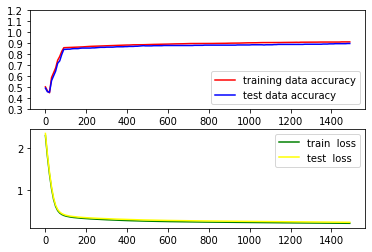

In [13]:
%run ../Part2&3/train_mlp_numpy.py

The default parameters are: learning rate = 1e-2, max steps = 1500, evaluation frequency = 10 epochs,
hidden units = "20".At last,it is clear that the accuracy  cannot attain 100%.So we adjust the learning rate as 1e-1

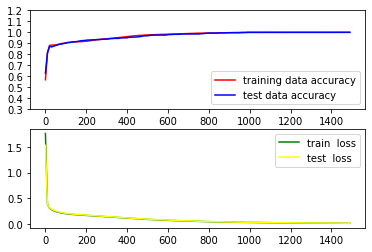

In [14]:
%run ../Part2&3/train_mlp_numpy.py --learning_rate 1e-1

accuracy=100% and loss=0

## Part III: Stochastic gradient descent
### Task1
implement the SGD(update the weight one by one) and reshuffle the train data each epoch by using backward() and update()in mlp and linear layer.
```
For each epoch
   For each data 
      mlp.forward (data)
      mlp.backward()
      update w and b
   Test
      caculate loss and accuracy
```
### Task2

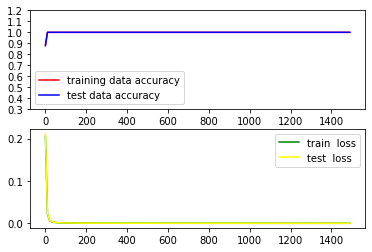

In [15]:
%run ../Part2&3/train_mlp_numpy.py --grad_type "SGD"

The SGD trains quicker than BGD under the default parameters.accuracy=100% and loss=0

## References
1. https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
2. https://blog.csdn.net/JiaJunLee/article/details/79665062